## Section 1: Overall read mapping dynamics under shifting environmental factors
Trends of reads mapping for diatoms and haptophytes. Then, dive in and look at specific mapping dynamics to E. hux strains

In [22]:
#Read in important paths 
import pandas as pd
import cPickle as cpk
import matplotlib as mpl
import sys
import numpy as np
sys.path.append("/Users/harrietalexander/anaconda/lib/python2.7/site-packages/matplotlib_venn-0.11-py2.7.egg")
sys.path.insert(1, '/Users/harrietalexander/anaconda/lib/python2.7/site-packages')
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib import gridspec
from itertools import combinations
import palettable.colorbrewer as b2m
import palettable as pal
import glob
from Bio import SeqIO
from string import ascii_lowercase, ascii_uppercase
from matplotlib.colors import LogNorm, NoNorm
from mpl_toolkits.basemap import Basemap

def invert(d):
    return dict( (v,k) for k in d for v in d[k] )

mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if mpl.rcParams['text.usetex'] == True:
        return s + r'$\%$'
    else:
        return s + '%'
mpl.rcParams['font.sans-serif']='Arial'

In [3]:
#Load in insitu dates 
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
DateDic={'E1-Z1' : datetime.date(2012, 8, 6), 'E1-Z4' : datetime.date(2012, 8, 12),
        'E2-Z5' : datetime.date(2012, 8, 24), 'E2-Z9' : datetime.date(2012, 8, 30),
        'E3-Z10' : datetime.date(2012, 9, 2), 'E3-Z11' : datetime.date(2012, 9, 5)}


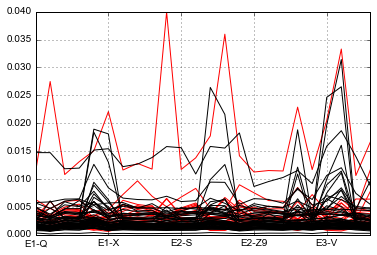

In [5]:
#read in all the MMETSP species summped reads
MMETSP_AllSpecies=pd.read_table('MMETSP_Mapping/MMETSP_All_Mapping.tab', index_col='gID')
#calc tpm
MMETSP_AllSpecies=(MMETSP_AllSpecies/MMETSP_AllSpecies.sum())
#Read in the lists of Dias and Haps
Dia_pd=pd.read_table('MMETSP_Mapping/OnlyDeep_Species_Diatoms.tab', index_col=0)
Hap_pd=pd.read_table('MMETSP_Mapping/OnlyDeep_Species_Hap.tab', index_col=0)
DiaList=Dia_pd.index
HapList=Hap_pd.index
#Get counts across all treatments
Dia_pd=MMETSP_AllSpecies.loc[DiaList]
Hap_pd=MMETSP_AllSpecies.loc[HapList]
#plot just overall TPM for diatoms and haptophytes : you can really see the peak in blooming of diaotms compared to haptophytes? More broad/more than one taxa? 
fig,ax=plt.subplots(1)
Hap_pd.T.plot(legend=False, color='r', ax=ax)
Dia_pd.T.plot(legend=False, color='k', ax=ax)

In [6]:
#Get the ranks for all the species
Dia_rank=Dia_pd.rank(axis=0,ascending=False)
Hap_rank=Hap_pd.rank(axis=0,ascending=False)
#get list of insitus etc. 
AllTreatments=Dia_rank.columns

insitu=[col for col in AllTreatments if 'Z' in col]
R=[col for col in AllTreatments if 'V' in col]


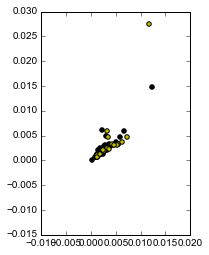

In [7]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.scatter(Dia_pd['E1-Z1'], Dia_pd['E1-R'], c='k')
ax.scatter(Hap_pd['E1-Z1'], Hap_pd['E1-R'], c='y')




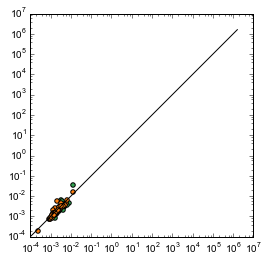

In [8]:
insitu=[col for col in AllTreatments if 'Z' in col]

R=[col for col in AllTreatments if 'R' in col]
R=[col for col in R if 'E3' not in col]

X=[col for col in AllTreatments if 'X' in col]

Q=[col for col in AllTreatments if 'Q' in col]

S=[col for col in AllTreatments if 'S' in col]
S=[col for col in S if 'E3' not in col]

T=[col for col in AllTreatments if 'T' in col]
T=[col for col in T if 'E3' not in col]

V=[col for col in AllTreatments if 'V' in col]
V=[col for col in T if 'E3' not in col]

treatments=[Q, R, S, T, V, X]

def ScatterTreatment(df, x, treatments, ax=None, colors=None):
    if colors==None:
        colors=pal.tableau.GreenOrange_6.hex_colors
    im=df[x].mean(axis=1)
    if ax == None:
        fig,ax=plt.subplots(1)

    for c,t in zip(colors,treatments):
        tm=df[t].mean(axis=1)
        ax.scatter(im,tm,c=c)        
        ax.set_aspect('equal')
#         ax.set_xlim([0,1600000])
#         ax.set_ylim([0,1600000])

fig,ax=plt.subplots(1)
ax.plot((0,1600000), (0, 1600000), 'k')
ax.set_yscale('log')
ax.set_xscale('log')

ScatterTreatment(Hap_pd, insitu, [R],ax=ax, colors=['#32A251', '#FF7F0F'])
ScatterTreatment(Dia_pd,insitu,[R],ax=ax, colors=['#FF7F0F'])

In [10]:
"""
Functions to create a radar chart

.. [1] http://en.wikipedia.org/wiki/Radar_chart
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts



# if __name__ == '__main__':
#     N = 6
#     theta = radar_factory(N, frame='polygon')

#     data = example_data()
#     spoke_labels = data.pop('column names')

#     fig = plt.figure(figsize=(9, 9))
#     fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

#     colors = ['b', 'r', 'g', 'm', 'y']
#     # Plot the four cases from the example data on separate axes
#     for n, title in enumerate(data.keys()):
#         ax = fig.add_subplot(2, 2, n+1, projection='radar')
#         plt.rgrids([0.2, 0.4, 0.6, 0.8])
#         ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
#                      horizontalalignment='center', verticalalignment='center')
#         for d, color in zip(data[title], colors):
#             ax.plot(theta, d, color=color)
#             ax.fill(theta, d, facecolor=color, alpha=0.25)
#         ax.set_varlabels(spoke_labels)

#     # add legend relative to top-left plot
#     plt.subplot(2, 2, 1)
#     labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
#     legend = plt.legend(labels, loc=(0.9, .95), labelspacing=0.1)
#     plt.setp(legend.get_texts(), fontsize='small')

#     plt.figtext(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
#                 ha='center', color='black', weight='bold', size='large')
#     plt.show()

###Create radar plots for the two different groups using 

/Users/harrietalexander/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:859: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


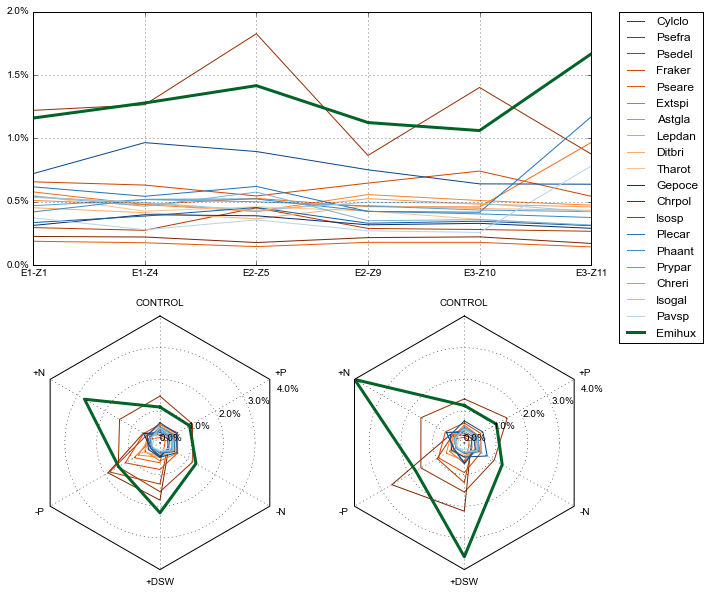

In [11]:

import matplotlib.ticker as mtick
DiaColor=pal.colorbrewer.sequential.Oranges_9_r.mpl_colormap(np.linspace(0,.7,10))
HapColor=pal.colorbrewer.sequential.Blues_9_r.mpl_colormap(np.linspace(0,.7,9))
EmiColor=pal.colorbrewer.sequential.Greens_9_r.mpl_colormap(0.1)
#Only plot the taxa that are >5 in any of the treatments
Dia_10=Dia_rank[Dia_rank[Dia_rank<=5].any(axis=1)].sort('E1-X').index
Hap_10=Hap_rank[Hap_rank[Hap_rank<=5].any(axis=1)].sort('E1-X').index
Hap_10=Hap_10[1:]
E1=[u'E1-Q', u'E1-R', u'E1-V', u'E1-X', u'E1-T', u'E1-S']
E2=[u'E2-Q', u'E2-R', u'E2-V', u'E2-X', u'E2-T', u'E2-S']


l=1
el=3

fig = plt.figure(figsize=(10, 10))

#Plot insitu data

ax3 = plt.subplot2grid((2,2), (0,0), colspan=2)


Dia_pd.loc[Dia_10,insitu].T.plot(ax=ax3, colors=DiaColor, lw=l)
Hap_pd.loc[Hap_10,insitu].T.plot(ax=ax3, colors=HapColor, lw=l)
Hap_pd.loc['Emihux',insitu].T.plot(ax=ax3, colors=EmiColor, lw=el)

ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#create radar figure for E1
ax = fig.add_subplot(2,2, 3, projection='radar')
N = 6
theta = radar_factory(N, frame='polygon')
data=Dia_pd.loc[Dia_10,E1]
spoke_labels = data.columns
for d,c in zip(data.index, DiaColor):
    ax.plot(theta, data.loc[d], color=c,lw=l)

data=Hap_pd.loc[Hap_10,E1]
for d,c in zip(data.index,HapColor):
    ax.plot(theta, data.loc[d], color=c,lw=l)
ax.plot(theta, Hap_pd.loc['Emihux',E1], color=EmiColor, lw=el)
ax.set_varlabels(spoke_labels)


#create radar figure for E2

ax2 = fig.add_subplot(2,2, 4, projection='radar')

N = 6
theta = radar_factory(N, frame='polygon')
data=Dia_pd.loc[Dia_10,E2]
spoke_labels = data.columns
for d,c in zip(data.index,DiaColor):
    ax2.plot(theta, data.loc[d], color=c, lw=l)
data=Hap_pd.loc[Hap_10,E2]
spoke_labels = data.columns
for d,c in zip(data.index,HapColor):
    ax2.plot(theta, data.loc[d], color=c, lw=l)
ax2.plot(theta, Hap_pd.loc['Emihux',E2], color=EmiColor, lw=3)
# ax2.fill(theta, Hap_pd.loc['Emihux',E2], color=EmiColor, alpha=.2)
    
    
spoke_labels=[u'CONTROL', u'+N', u'-P', u'+DSW', u'-N', u'+P']
ax.set_varlabels(spoke_labels)
ax2.set_varlabels(spoke_labels)


ax.set_ylim([0,.04])      
ax2.set_ylim([0,.04])      

ax.set_yticks(np.arange(0,.045,.01))
ax2.set_yticks(np.arange(0,.045,.01))
ax.set_yticks(np.arange(0,.045,.01))
ax2.set_yticks(np.arange(0,.045,.01))


# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = mtick.FuncFormatter(to_percent)

# Set the formatter
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

fig.savefig('GroupProfile.pdf')

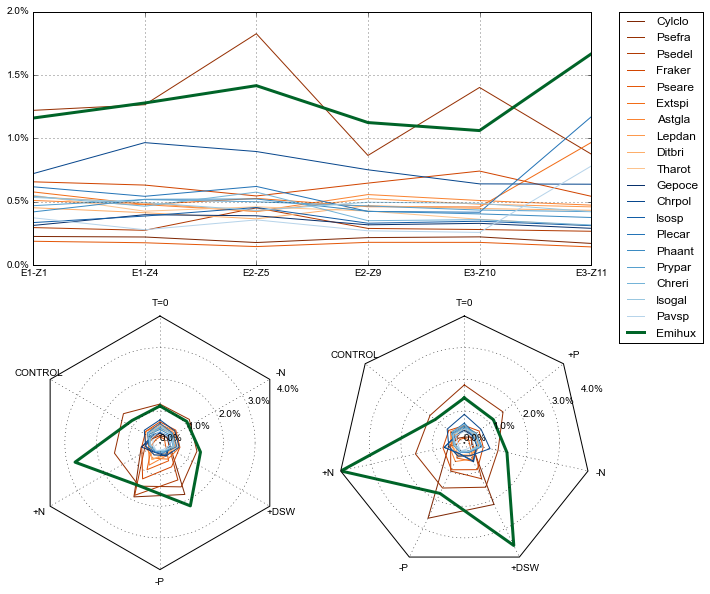

In [29]:

import matplotlib.ticker as mtick
DiaColor=pal.colorbrewer.sequential.Oranges_9_r.mpl_colormap(np.linspace(0,.7,10))
HapColor=pal.colorbrewer.sequential.Blues_9_r.mpl_colormap(np.linspace(0,.7,9))
EmiColor=pal.colorbrewer.sequential.Greens_9_r.mpl_colormap(0.1)
#Only plot the taxa that are >5 in any of the treatments
Dia_10=Dia_rank[Dia_rank[Dia_rank<=5].any(axis=1)].sort('E1-X').index
Hap_10=Hap_rank[Hap_rank[Hap_rank<=5].any(axis=1)].sort('E1-X').index
Hap_10=Hap_10[1:]
E1=[u'E1-Z1',u'E1-Q', u'E1-R', u'E1-V', u'E1-X', u'E1-T', u'E1-S']
E2=[u'E2-Z5',u'E2-Q', u'E2-R', u'E2-V', u'E2-X', u'E2-T', u'E2-S']
Dia_pd.sum()

l=1
el=3

fig = plt.figure(figsize=(10, 10))

#Plot insitu data

ax3 = plt.subplot2grid((2,2), (0,0), colspan=2)


Dia_pd.loc[Dia_10,insitu].T.plot(ax=ax3, colors=DiaColor, lw=l)
Hap_pd.loc[Hap_10,insitu].T.plot(ax=ax3, colors=HapColor, lw=l)
Hap_pd.loc['Emihux',insitu].T.plot(ax=ax3, colors=EmiColor, lw=el)

ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#create radar figure for E1
ax = fig.add_subplot(2,2, 3, projection='radar')
N = 7
theta = radar_factory(N, frame='polygon')
data=Dia_pd.loc[Dia_10,E1]
spoke_labels = data.columns
for d,c in zip(data.index, DiaColor):
    ax.plot(theta, data.loc[d], color=c,lw=l)

data=Hap_pd.loc[Hap_10,E1]
for d,c in zip(data.index,HapColor):
    ax.plot(theta, data.loc[d], color=c,lw=l)
ax.plot(theta, Hap_pd.loc['Emihux',E1], color=EmiColor, lw=el)
ax.set_varlabels(spoke_labels)


#create radar figure for E2

ax2 = fig.add_subplot(2,2, 4, projection='radar')

N = 7
theta = radar_factory(N, frame='polygon')
data=Dia_pd.loc[Dia_10,E2]
spoke_labels = data.columns
for d,c in zip(data.index,DiaColor):
    ax2.plot(theta, data.loc[d], color=c, lw=l)
data=Hap_pd.loc[Hap_10,E2]
spoke_labels = data.columns
for d,c in zip(data.index,HapColor):
    ax2.plot(theta, data.loc[d], color=c, lw=l)
ax2.plot(theta, Hap_pd.loc['Emihux',E2], color=EmiColor, lw=3)
# ax2.fill(theta, Hap_pd.loc['Emihux',E2], color=EmiColor, alpha=.2)
    
    
spoke_labels=['T=0',u'CONTROL', u'+N', u'-P', u'+DSW', u'-N', u'+P']
ax.set_varlabels(spoke_labels)
ax2.set_varlabels(spoke_labels)


ax.set_ylim([0,.04])      
ax2.set_ylim([0,.04])      

ax.set_yticks(np.arange(0,.045,.01))
ax2.set_yticks(np.arange(0,.045,.01))
ax.set_yticks(np.arange(0,.045,.01))
ax2.set_yticks(np.arange(0,.045,.01))


# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = mtick.FuncFormatter(to_percent)

# Set the formatter
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

fig.savefig('GroupProfile.pdf')

In [12]:
from matplotlib.ticker import FuncFormatter 

def myfunc(x, pos=0): 
    return '%1.1f%%'%(100*x) 


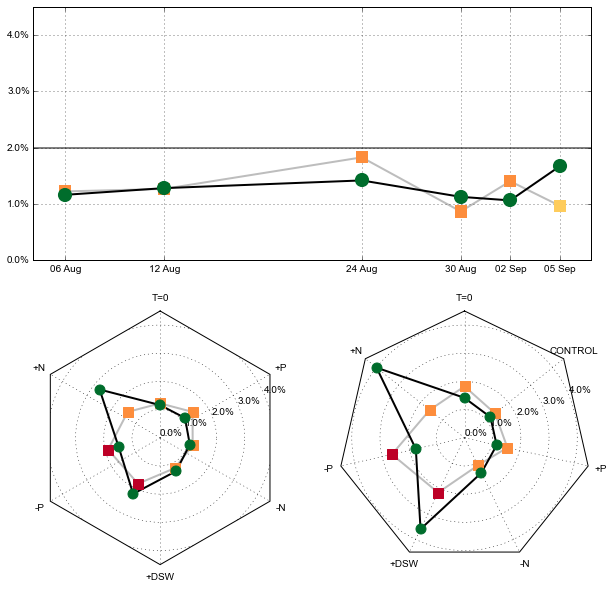

In [14]:

import matplotlib.ticker as mtick
DiaColor=pal.colorbrewer.sequential.YlOrRd_5.hex_colors
EmiColor=pal.colorbrewer.sequential.Greens_9_r.hex_colors
#Set the E1 and E2 data values
E1=[u'E1-Z1', u'E1-R', u'E1-V', u'E1-X', u'E1-T', u'E1-S',u'E1-Q',]
E2=[u'E2-Z5', u'E2-R', u'E2-V', u'E2-X', u'E2-T', u'E2-S',u'E2-Q',]


dmax=Dia_pd.max()
dmaxID=Dia_pd.idxmax()
hmax=Hap_pd.max()
hmaxID=Hap_pd.idxmax()

#choose the colors
D_id_color = {'Psefra': DiaColor[2], 'Cylclo': DiaColor[4], 'Psedel': DiaColor[0], 
             'Extspi': DiaColor[1]}
H_id_color = {'Emihux': EmiColor[1]}

color_map = [D_id_color[id] for id in dmaxID[insitu]]

DiaLinCol=pal.colorbrewer.sequential.Greys_3.hex_colors[1]
#initialize figure
fig = plt.figure(figsize=(10, 10))

#get dates
dates=[DateDic[i] for i in insitu]

#Plot insitu data
#line weight
l=2
el=3
#add subplot
ax3 = plt.subplot2grid((2,2), (0,0), colspan=2)

#get the maximum data + the id of the max organism for all the data
#plot the data with color indicating the most abundant organism (max)
ax3.plot(dates,dmax[insitu], color=DiaLinCol,linestyle='-', lw=l)
ax3.scatter(dates,dmax[insitu],marker='s',s=150, lw=0, color=color_map, zorder=10)
ax3.plot(dates, hmax[insitu], color='k', lw=l)
ax3.scatter(dates,hmax[insitu],s=200, lw=0, color=EmiColor[1], zorder=11)
ax3.set_ylim([0,.045])      
ax3.set_yticks(np.arange(0,.045,.01))
ax3.grid(True)
ax3.set_xticks(dates)
ax3.yaxis.set_major_formatter(FuncFormatter(myfunc)) 
ax3.axhline(.02,color='grey',lw=2)

#format dates
myFmt = mdates.DateFormatter('%d %b')
ax3.xaxis.set_major_formatter(myFmt)
#create radar figure for E1
ax = fig.add_subplot(2,2, 3, projection='radar')
N = 7
theta = radar_factory(N, frame='polygon')
#plot diatoms

color_map = [D_id_color[id] for id in dmaxID[E1]]

data=dmax[E1]
ax.plot(theta, data, color=DiaLinCol,lw=l)
ax.scatter(theta, data, s=100, marker='s', color=color_map,zorder=10)


#plot ehux
data=hmax[E1]
ax.plot(theta, data, color='k',lw=l)
ax.scatter(theta, data, s=100, color=EmiColor[1],zorder=11)

#create radar figure for E2
ax2 = fig.add_subplot(2,2, 4, projection='radar')
N = 7
theta = radar_factory(N, frame='polygon')
#plot diatoms

color_map = [D_id_color[id] for id in dmaxID[E2]]

data=dmax[E2]
ax2.plot(theta, data, color=DiaLinCol,lw=l)
ax2.scatter(theta, data, s=100, marker='s', color=color_map,zorder=10)


#plot ehux
data=hmax[E2]
ax2.plot(theta, data, color='k',lw=l)
ax2.scatter(theta, data, s=100, color=EmiColor[1],zorder=11)


spoke_labels=['T=0', u'+N', u'-P', u'+DSW', u'-N', u'+P',u'CONTROL']
ax.set_varlabels(spoke_labels)
ax2.set_varlabels(spoke_labels)
ax.set_ylim([0,.045])      
ax2.set_ylim([0,.045])      
ax.axhline(.02,color='grey',lw=2)
ax2.axhline(.02,color='grey',lw=2)

ax2.set_yticks(np.arange(0,.045,.01))
ax.set_yticks(np.arange(0,.045,.01))
ax.yaxis.set_major_formatter(FuncFormatter(myfunc)) 
ax2.yaxis.set_major_formatter(FuncFormatter(myfunc)) 

fig.savefig('Figures/v1/Figure1.pdf')

##Assessing the strain distribution of E. huxleyi compiled transcriptomes/genome transcripts in the field

In [15]:
#Load in the hash data
gFHash=cpk.load(open('orthoMCL_output/Ehux_Dictionary.pickle', 'r'))


In [16]:
#Parse the gFHash to tally the number of genes in an orthologus group and the number of genes from each of the individual taxa
#Panda dataframe of form : Orthologus group | total number of genes in orthologus group | total number from each strain
#Nested for loop... so it takes a while. 
Hist_PD=pd.DataFrame(index=gFHash.keys(),columns=['NumGenes', 'Emi374', 'Emi379', 'Emi370', 'Emi219', 'Emihu1'])
Hist_PD=Hist_PD.fillna(0)
for i,key in enumerate(gFHash):
#     if i==100:
#         break
    l=len(gFHash[key])
    Hist_PD.loc[key, 'NumGenes']=l
    for transcript in gFHash[key]:
        org=transcript.split('|')[0]
        Hist_PD.loc[key,org]+=1


In [18]:
GenesInOrg={}
GenesInOrg['Emi219']=Hist_PD[Hist_PD.Emi219>0].index
GenesInOrg['Emi379']=Hist_PD[Hist_PD.Emi379>0].index
GenesInOrg['Emi370']=Hist_PD[Hist_PD.Emi370>0].index
GenesInOrg['Emi374']=Hist_PD[Hist_PD.Emi374>0].index
GenesInOrg['Emihu1']=Hist_PD[Hist_PD.Emihu1>0].index

def Calculate_Venn_comparison(hash):
    #input = a Hash of the form hash[Organism]=list of orthologus groups
    #Outputs a hash of the form key = all the variations of thes sets : list of orthologus genes in an inclusive way
    #It is inclusive so the set containing A uniq genes is going to contain all the genes for an org
    variations={}
    for i in range(len(hash)):
        for v in combinations(hash.keys(), i+1):
            vsets = [hash[x] for x in v]
            variations[tuple(sorted(v))]=reduce(lambda x,y: x.intersection(y), vsets)
    return variations

def GetDifference_Venn(variations):
    #Function takes the input from the above function and outputs a hash of the same format but 
    #each set is uniqe: e.g. there are no repeats of orthologus groups across sets. 
    outdict={}
    vkeys=variations.keys()
    #loop over each of the variable cases
    for v in variations:
        #create a set to do the comparisons
        vset=set(v)
        vdata_set=set(variations[v])
        #loop over all other variations
        for j in variations:
            #if v is a subset of jset we want to remove the items of jset from v set
            jdata_set=set(variations[j])
            jset=set(j)
            if vset.issubset(jset):
                if vset==jset:
                    pass
                else: 
                    newdata=vdata_set-jdata_set
                    vdata_set=newdata
        outdict[v]=vdata_set
    return outdict

#Get the genes that are unique with in the venn: format of the hash = name of the subset : Orthologus gene groups
Genes_In_Each_Cat=Calculate_Venn_comparison(GenesInOrg)
Genes_Uniq_Venn=GetDifference_Venn(Genes_In_Each_Cat)

# for key in Genes_Uniq_Venn:
#     fName='_'.join(list(key))
#     fName='Species_GeneLists_Venn/'+fName+'.list'
#     file=open(fName, 'w')

#     for item in Genes_Uniq_Venn[key]:
#         file.write(item.strip())
#         file.write('\n')
#     file.close()

I am a bit concerned that the Ehux "unique" genes in the genome are actually core but simply not well expressed in the transcriptomes well enough to have been able to be assembled into a transcript (?)

In [23]:
Genes_Uniq_Venn=GetDifference_Venn(Genes_In_Each_Cat)
Genes_Uniq_Venn_PaperUpdate=dict(Genes_Uniq_Venn)
gFHash_inverted=invert(gFHash)

#read in genome paper core genes
f=open('EhuxGenome_Core.tab','r')
Genome_paper_Core=[]
for line in f:
    protein='Emihu1|'+line.strip()
    Genome_paper_Core.append(protein)
#Get the Emihu unique set of genes  
for key in Genes_Uniq_Venn.keys():
    Emihu1_unique=set()
    for x in Genes_Uniq_Venn[key]:
        Emihu1_unique.update(set(gFHash[x]))
    NewCore=[]
    TruVar=[]
    for gene in Emihu1_unique:
        if gene in Genome_paper_Core:
            NewCore.append(gene)
        else:
            TruVar.append(gene)
    NewCore_og=set()
    TruVar_og=set()
    for gene in NewCore:
        NewCore_og.update([gFHash_inverted[gene]])
    for gene in TruVar:
        TruVar_og.update([gFHash_inverted[gene]])
    Genes_Uniq_Venn_PaperUpdate[key]=TruVar_og
    core=set(Genes_Uniq_Venn_PaperUpdate[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')])
    core.update(NewCore_og)
    Genes_Uniq_Venn_PaperUpdate[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')]=core


In [25]:
for x in Genes_Uniq_Venn_PaperUpdate.keys():
    print x, len(Genes_Uniq_Venn_PaperUpdate[x])

('Emi219', 'Emi379', 'Emihu1') 296
('Emi219', 'Emi370', 'Emi379') 1236
('Emi219',) 7407
('Emi219', 'Emi374', 'Emi379', 'Emihu1') 333
('Emi374', 'Emihu1') 280
('Emi219', 'Emi379') 593
('Emi219', 'Emihu1') 783
('Emi219', 'Emi370', 'Emi374') 638
('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1') 16206
('Emi370', 'Emi374', 'Emi379') 227
('Emi370',) 8686
('Emi219', 'Emi374', 'Emi379') 195
('Emi219', 'Emi370', 'Emihu1') 2815
('Emihu1',) 4427
('Emi219', 'Emi370') 3045
('Emi379', 'Emihu1') 874
('Emi374',) 3189
('Emi219', 'Emi370', 'Emi374', 'Emihu1') 1196
('Emi219', 'Emi374') 330
('Emi219', 'Emi370', 'Emi374', 'Emi379') 1380
('Emi370', 'Emi374', 'Emihu1') 206
('Emi219', 'Emi374', 'Emihu1') 185
('Emi370', 'Emi374') 490
('Emi370', 'Emi379') 582
('Emi374', 'Emi379', 'Emihu1') 172
('Emi370', 'Emihu1') 751
('Emi219', 'Emi370', 'Emi379', 'Emihu1') 2066
('Emi379',) 4536
('Emi370', 'Emi374', 'Emi379', 'Emihu1') 243
('Emi374', 'Emi379') 321
('Emi370', 'Emi379', 'Emihu1') 264


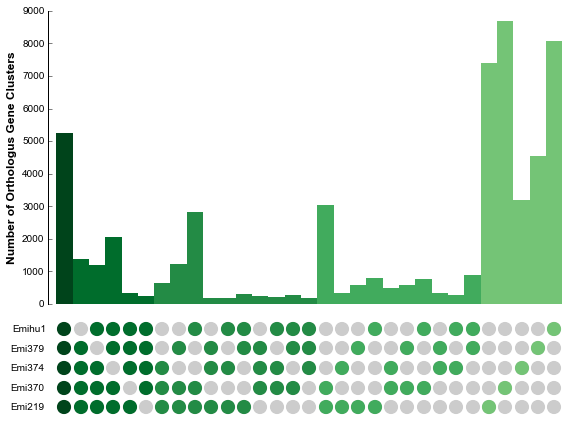

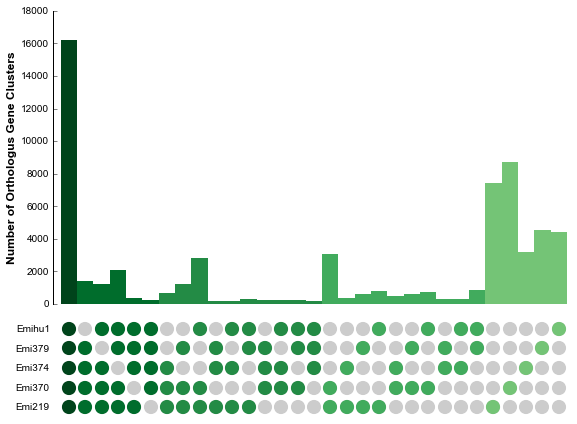

In [26]:

def plot_Scatter_histogram(Hash_in,s=200):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)

    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greens_9.hex_colors
#   fig=plt.figure(figsize=(num_sets/3, num_groups))
    fig = plt.figure(figsize=(8, 6)) 

    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    #create grid of dots
    ax2.scatter(x,y, c=color[1], linewidth=0, s=s)
    #alter the range etc. of pltos
    ax1.set_xlim([0, np.max(x)+.7])
    ax2.set_xlim([0, np.max(x)+.7])
    ax2.set_ylim([.5, np.max(y)+.5])
    ax2.set_yticks(range(1,num_groups+1))
    ax2.set_yticklabels(grpNames)
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        left='off',
        labelbottom='off') 
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    plt.tight_layout()
    ax1.set_ylabel('Number of Orthologus Gene Clusters', fontsize='large', weight='bold')
    
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis
            ax2.scatter(i,n, s=s, c=color_bar[len(key)+3], lw=0)
            rect=plt.Rectangle((i-.5,0), 1, nGenes, fc=color_bar[len(key)+3],lw=0)
            ax1.add_patch(rect)
            ax1.plot()
    return fig, xs
    
fig1,EHX_SortedList=plot_Scatter_histogram(Genes_Uniq_Venn,s=200)
fig2,EHX_SortedList=plot_Scatter_histogram(Genes_Uniq_Venn_PaperUpdate,s=200)


In [28]:
CoreGenes=Genes_Uniq_Venn_PaperUpdate[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')] #get the genes that are core to all organisms
#create a PD Dataframe that is the number of genes from each org in the core gene set
TranscriptTally=pd.DataFrame(columns=('Emihu1','Emi219', 'Emi370', 'Emi374', 'Emi379'), index=CoreGenes) 
TranscriptTally=TranscriptTally.fillna(0)
for Gene in CoreGenes:
    for transcript in gFHash[Gene]:
        species=transcript.split('|')[0]
        TranscriptTally.loc[Gene,species]+=1

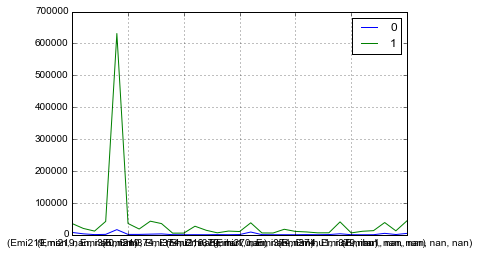

In [30]:
#Import data

test=pd.read_table("output_RSEM_Bowtie2/E2-R_ACTTGA.genes.results", index_col='gene_id')

outHash={}
for group in Genes_Uniq_Venn:
    p=test.loc[Genes_Uniq_Venn_PaperUpdate[group]].TPM.sum()
    outHash[group]=[len(Genes_Uniq_Venn_PaperUpdate[group]), p]

pd.DataFrame(outHash).T.plot()

In [31]:
def plot_Scatter_histogram_fieldTPM(Hash_in,s=200, title=None, filetype='.pdf', plotType=None):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)

    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greens_9.hex_colors
#   fig=plt.figure(figsize=(num_sets/3, num_groups))
    fig = plt.figure(figsize=(8, 6)) 
    fig.suptitle(title)

    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    #create grid of dots
    ax2.scatter(x,y, c=color[1], linewidth=0, s=s)
    #alter the range etc. of pltos
    ax1.set_xlim([0, np.max(x)+.7])
    ax2.set_xlim([0, np.max(x)+.7])
    ax2.set_ylim([.5, np.max(y)+.5])
    ax2.set_yticks(range(1,num_groups+1))
    ax2.set_yticklabels(grpNames)
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        left='off',
        labelbottom='off') 
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    plt.tight_layout()
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis
            ax2.scatter(i,n, s=s, c=color_bar[len(key)+3], lw=0)
            if plotType=='tpm':
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Total TPM', fontsize='large', weight='bold')

            elif plotType=='% of genes':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['Greater0'])/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('% of genes expressed', fontsize='large', weight='bold')
            elif plotType=='TPM norm to % of genes in field':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['TPM'])/Hash_in[key]['Greater0'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('TPM normalized to expressed genes #', fontsize='large', weight='bold')
             
            else:    
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM']/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Average TPM within Group', fontsize='large', weight='bold')

            ax1.add_patch(rect)
            ax1.plot()
    fig.savefig(title+filetype)
    return fig

def ParseField_RSEM_Files(files):
    InsituHash={}
    for f in glob.glob(files):
        name=f.split('/')[1]
        name=name.split('_')[0]
        print name
        InsituHash[name]=pd.read_table(f,index_col='gene_id')

    outHash={}
    for sample in InsituHash:
        a={}
        for group in Genes_Uniq_Venn_PaperUpdate:
            match=InsituHash[sample].loc[Genes_Uniq_Venn_PaperUpdate[group]].TPM
            summedTPM=InsituHash[sample].loc[Genes_Uniq_Venn_PaperUpdate[group]].TPM.sum()
            len_match=len(match)
            len_match_greater0=len(match[match>0])
            a[group]={}
            a[group]['TPM']=summedTPM
            a[group]['Len_total']=len_match
            a[group]['Greater0']=len_match_greater0
        outHash[sample]=a
    return outHash
        


In [379]:
InsituHash=ParseField_RSEM_Files('output_RSEM_Bowtie2/*Z*genes.results')


E1-Z1
E1-Z4
E2-Z5
E2-Z9
E3-Z10
E3-Z11


In [32]:
def plot_Scatter_histogram_fieldTPM_grid(Hash_in,s=200, title=None, filetype='.pdf', plotType=None, ax1=None):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in) #take in the number of samples
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys())))) #sort the names by group length
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)
    
    #Define the color schemes
    specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greys_7.hex_colors
    color_ind=b2m.qualitative.Set2_6.hex_colors
    del color_ind[4]    
    if ax1==None: 
        fig = plt.figure(figsize=(8, 6)) 
        ax1=fig.add_subplot(111)
    ax1.set_xlim([0, np.max(x)+.7])
    ax1.set_title(title)
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    print xs
    plt.tight_layout()
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis

            #Define the color scheme
            if len(key)>1:
                fc=color_bar[len(key)+1]
            else:
                fc=color_ind[specColorKey[key[0]]]
                
            #Plot different type of plots
            if plotType=='tpm':
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM'], fc=fc,lw=0)
                ax1.set_ylabel('Total TPM', fontsize='large', weight='bold')

            elif plotType=='% of genes':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['Greater0'])/Hash_in[key]['Len_total'], fc=fc,lw=0)
                ax1.set_ylabel('% of genes expressed', fontsize='large', weight='bold')
            elif plotType=='TPM norm to % of genes in field':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['TPM'])/Hash_in[key]['Greater0'], fc=fc,lw=0)
                ax1.set_ylabel('TPM normalized to expressed genes #', fontsize='large', weight='bold')
            elif plotType=='Total':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['Len_total']), fc=fc,lw=0)
                ax1.set_ylabel('Number of Orthologus Genes', fontsize='large', weight='bold')
            else:    
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM']/Hash_in[key]['Len_total'], fc=fc,lw=0)
                ax1.set_ylabel('Average TPM within Group', fontsize='large', weight='bold')

            ax1.add_patch(rect)
            ax1.plot()
    return ax1



In [35]:
def plot_Scatter_grid(Hash_in,s=200, title=None, ax2=None):
    #given an axis plot the scatter of species 
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)
    
    #Change the color scheme to be grey --> colors
    specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
    color=b2m.sequential.Greys_6.hex_colors
    color_bar=b2m.sequential.Greys_7.hex_colors
    color_ind=b2m.qualitative.Set2_6.hex_colors
    del color_ind[4]
    if ax2==None:
        fig = plt.figure(figsize=(8, 6)) 
        ax2=fig.add_subplot(111)
    ax2.scatter(x,y, c=color[1], linewidth=0, s=s)

    ax2.set_xlim([0, np.max(x)+.7])
    ax2.set_ylim([.5, np.max(y)+.5])
    ax2.set_yticks(range(1,num_groups+1))
    ax2.set_yticklabels(grpNames)
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        left='off',
        labelbottom='off') 
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    plt.tight_layout()
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        c=color_bar[len(key)+1]
        if len(key)==1:
            c=color_ind[specColorKey[key[0]]]
        for j in key:
            n=grpHash[j]#number along the y axis
            ax2.scatter(i,n, s=s, c=c, lw=0)
        

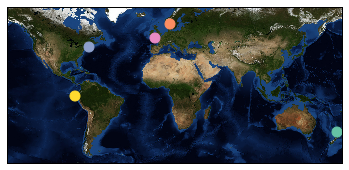

In [36]:
Emi_location=pd.DataFrame(columns=['Latitude', 'Longitude'], index=('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1'))
Emi_location.loc['Emi374']=[42.5, -69]
Emi_location.loc['Emi370']=[59.5, 10.6]
Emi_location.loc['Emi379']=[50.1669, -4.2504]
Emi_location.loc['Emihu1']=[-2.6667, -82.7167]
Emi_location.loc['Emi219']=[-36.26, 174.8]


lons=Emi_location['Longitude']
lats=Emi_location['Latitude']
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-150,urcrnrlon=180,resolution='c')
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.bluemarble()
for Ehx in Emi_location.index:
    lon=lons.loc[Ehx]
    lat=lats.loc[Ehx]
    x, y = m(lon,lat)
    m.scatter(x,y,100,marker='o',color=color_ind[specColorKey[Ehx]])


## With the core genes from the paper shifted over

E1-Q
E1-R
E1-S
E1-T
E1-V
E1-X
E1-Z1
E1-Z4
E2-Q
E2-R
E2-S
E2-T
E2-V
E2-X
E2-Z5
E2-Z9
E3-Q
E3-R
E3-S
E3-T
E3-V
E3-X
E3-Z10
E3-Z11
E1-Z1
E1-Z4
E2-Z5
E2-Z9
E3-Z10
E3-Z11
[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370', 'Emi374', 'Emi379'), ('Emi219', 'Emi370', 'Emi374', 'Emihu1'), ('Emi219', 'Emi370', 'Emi379', 'Emihu1'), ('Emi219', 'Emi374', 'Emi379', 'Emihu1'), ('Emi370', 'Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370', 'Emi374'), ('Emi219', 'Emi370', 'Emi379'), ('Emi219', 'Emi370', 'Emihu1'), ('Emi219', 'Emi374', 'Emi379'), ('Emi219', 'Emi374', 'Emihu1'), ('Emi219', 'Emi379', 'Emihu1'), ('Emi370', 'Emi374', 'Emi379'), ('Emi370', 'Emi374', 'Emihu1'), ('Emi370', 'Emi379', 'Emihu1'), ('Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370'), ('Emi219', 'Emi374'), ('Emi219', 'Emi379'), ('Emi219', 'Emihu1'), ('Emi370', 'Emi374'), ('Emi370', 'Emi379'), ('Emi370', 'Emihu1'), ('Emi374', 'Emi379'), ('Emi374', 'Emihu1'), ('Emi379', 'Emihu1'), ('Emi219',), ('Emi370',), ('Emi

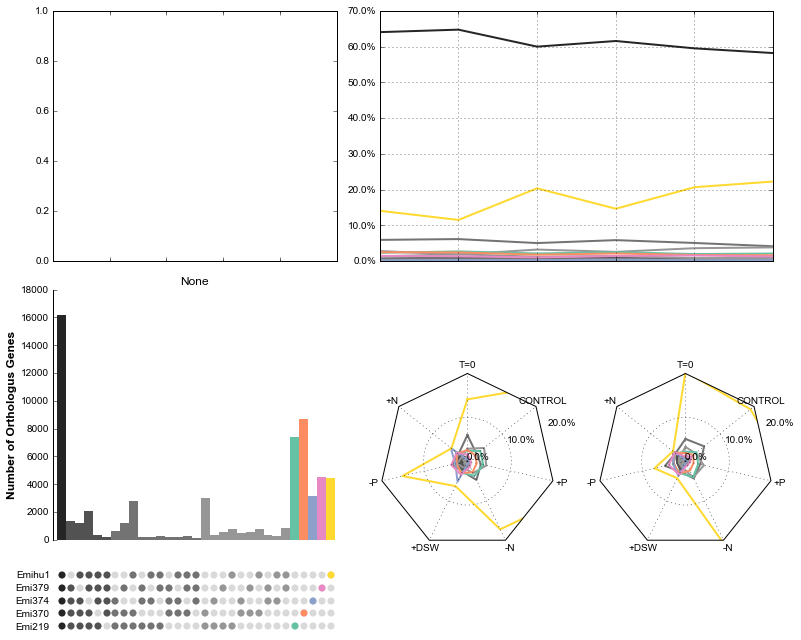

In [40]:
#WITH THE PAPER UPDATED FIGURES
def plot_Scatter_histogram_fieldTPM(Hash_in,s=200, title=None, filetype='.pdf', plotType=None):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)

    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greens_9.hex_colors
#   fig=plt.figure(figsize=(num_sets/3, num_groups))
    fig = plt.figure(figsize=(8, 6)) 
    fig.suptitle(title)

    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    #create grid of dots
    ax2.scatter(x,y, c=color[1], linewidth=0, s=s)
    #alter the range etc. of pltos
    ax1.set_xlim([0, np.max(x)+.7])
    ax2.set_xlim([0, np.max(x)+.7])
    ax2.set_ylim([.5, np.max(y)+.5])
    ax2.set_yticks(range(1,num_groups+1))
    ax2.set_yticklabels(grpNames)
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        left='off',
        labelbottom='off') 
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    plt.tight_layout()
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis
            ax2.scatter(i,n, s=s, c=color_bar[len(key)+3], lw=0)
            if plotType=='tpm':
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Total TPM', fontsize='large', weight='bold')

            elif plotType=='% of genes':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['Greater0'])/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('% of genes expressed', fontsize='large', weight='bold')
            elif plotType=='TPM norm to % of genes in field':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['TPM'])/Hash_in[key]['Greater0'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('TPM normalized to expressed genes #', fontsize='large', weight='bold')
             
            else:    
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM']/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Average TPM within Group', fontsize='large', weight='bold')

            ax1.add_patch(rect)
            ax1.plot()
    fig.savefig(title+filetype)
    return fig

def ParseField_RSEM_Files(files):
    InsituHash={}
    for f in glob.glob(files):
        name=f.split('/')[1]
        name=name.split('_')[0]
        print name
        InsituHash[name]=pd.read_table(f,index_col='gene_id')

    outHash={}
    for sample in InsituHash:
        a={}
        for group in Genes_Uniq_Venn_PaperUpdate:
            match=InsituHash[sample].loc[Genes_Uniq_Venn_PaperUpdate[group]].TPM
            summedTPM=InsituHash[sample].loc[Genes_Uniq_Venn_PaperUpdate[group]].TPM.sum()
            len_match=len(match)
            len_match_greater0=len(match[match>0])
            a[group]={}
            a[group]['TPM']=summedTPM
            a[group]['Len_total']=len_match
            a[group]['Greater0']=len_match_greater0
        outHash[sample]=a
    return outHash

########

AllHash=ParseField_RSEM_Files('output_RSEM_Bowtie2/*genes.results')
Ehx_TPM_df=pd.DataFrame(columns=AllHash.keys(), index=AllHash['E1-Q'].keys())
for k in AllHash.keys():
    for x in AllHash[k].keys():
        val=AllHash[k][x]['TPM']
        Ehx_TPM_df.loc[x,k]=val
Ehx_TPMPercent=Ehx_TPM_df/Ehx_TPM_df.sum()

#define order and colors
E1=[u'E1-Z1',u'E1-R', u'E1-V', u'E1-X', u'E1-T', u'E1-S',u'E1-Q']
E2=[u'E2-Z5', u'E2-R', u'E2-V', u'E2-X', u'E2-T', u'E2-S',u'E2-Q']

Order=[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1'), 
                          ('Emi219', 'Emi370', 'Emi374', 'Emi379'), ('Emi219', 'Emi370', 'Emi374', 'Emihu1'), 
                          ('Emi219', 'Emi370', 'Emi379', 'Emihu1'), ('Emi219', 'Emi374', 'Emi379', 'Emihu1'), 
                          ('Emi370', 'Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370', 'Emi374'), 
                          ('Emi219', 'Emi370', 'Emi379'), ('Emi219', 'Emi370', 'Emihu1'), 
                          ('Emi219', 'Emi374', 'Emi379'), ('Emi219', 'Emi374', 'Emihu1'), 
                          ('Emi219', 'Emi379', 'Emihu1'), ('Emi370', 'Emi374', 'Emi379'), 
                          ('Emi370', 'Emi374', 'Emihu1'), ('Emi370', 'Emi379', 'Emihu1'), 
                          ('Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370'), 
                          ('Emi219', 'Emi374'), ('Emi219', 'Emi379'), ('Emi219', 'Emihu1'), 
                          ('Emi370', 'Emi374'), ('Emi370', 'Emi379'), ('Emi370', 'Emihu1'), 
                          ('Emi374', 'Emi379'), ('Emi374', 'Emihu1'), ('Emi379', 'Emihu1'), 
                          ('Emi219',), ('Emi370',), ('Emi374',), ('Emi379',), ('Emihu1',)]

specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
color=b2m.sequential.Greys_6.hex_colors
color_bar=b2m.sequential.Greys_7.hex_colors
color_ind=b2m.qualitative.Set2_6.hex_colors
del color_ind[4]
colors=[]
for key in Order:
        if len(key)>1:
            colors.append(color_bar[len(key)+1])
        else:
            colors.append(color_ind[specColorKey[key[0]]])

l=2
            
#create the grid spec space
fig=plt.figure(figsize=(11,9))
gs = gridspec.GridSpec(7, 7)
ax1 = fig.add_subplot(gs[0:3, 0:3])
ax2 = fig.add_subplot(gs[0:3,3:])
ax3 = fig.add_subplot(gs[3:6, 0:3])
ax3b = fig.add_subplot(gs[6:, 0:3])
ax4 = fig.add_subplot(gs[3:, 3:5],projection='radar')
ax5 = fig.add_subplot(gs[3:, 5:],projection='radar')

InsituHash=ParseField_RSEM_Files('output_RSEM_Bowtie2/*Z*genes.results')

"""
Plot the map
"""
# ax1 = fig.add_subplot(gs[0:3, 0:3])
# lons=Emi_location['Longitude']
# lats=Emi_location['Latitude']
# m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
#             llcrnrlon=-150,urcrnrlon=180,resolution='c')
# # m.drawcoastlines()
# # m.fillcontinents(color='coral',lake_color='aqua')
# m.bluemarble()
# for Ehx in Emi_location.index:
#     lon=lons.loc[Ehx]
#     lat=lats.loc[Ehx]
#     x, y = m(lon,lat)
#     m.scatter(x,y,100,marker='o',color=color_ind[specColorKey[Ehx]])
"""
Plot the time series
"""
Ehx_TPMPercent=Ehx_TPMPercent.loc[Order]
Ehx_TPMPercent[insitu].T.plot(ax=ax2, color=colors, lw=2, legend=False)
ax2.set_xticklabels(insitu)
ax2.yaxis.set_major_formatter(formatter)

""" 
Plot the break down of the ortho mcl clusters
"""

plot_Scatter_grid(InsituHash['E1-Z1'], s=50, ax2=ax3b)
plot_Scatter_histogram_fieldTPM_grid(InsituHash['E1-Z1'],s=200, title=None, filetype='.pdf', plotType='Total', ax1=ax3)


"""
Plot the radar plots for the experiments
"""

N = 7
theta = radar_factory(N, frame='polygon')
data=Ehx_TPMPercent[E1]
spoke_labels = data.columns
for d,c in zip(range(len(data.index)),colors):
    ax4.plot(theta, data.loc[[Order[d]]].T, color=c, lw=l)
spoke_labels=['T=0', u'+N', u'-P', u'+DSW', u'-N', u'+P',u'CONTROL',]
ax4.set_varlabels(spoke_labels)
ax4.yaxis.set_major_formatter(formatter)


N = 7
theta = radar_factory(N, frame='polygon')
data=Ehx_TPMPercent[E2]
spoke_labels = data.columns
for d,c in zip(range(len(data.index)),colors):
    ax5.plot(theta, data.loc[[Order[d]]].T, color=c, lw=l)
spoke_labels=['T=0', u'+N', u'-P', u'+DSW', u'-N', u'+P',u'CONTROL',]
ax5.set_varlabels(spoke_labels)

ax4.set_ylim([0,.1])
ax5.set_ylim([0,.1])
ax4.set_yticks(np.arange(0,.25,.1))
ax5.set_yticks(np.arange(0,.25,.1))
ax4.yaxis.set_major_formatter(formatter)
ax5.yaxis.set_major_formatter(formatter)

fig.savefig('EmilianaDynamics.pdf')

##Section 2: Functional shifts between taxonomic groups
###KOG Orthology analaysis

In [393]:
#Read in KOG table and create a dictionary of dictionaries to describe all the data. 
KOG_MasterDict={}
file=open('TranscriptomeAnnotation/KOG/output/output.2', 'r')
header=next(file)
header= header.split('\t')
for l in file:
    line=l.split('\t')
    PID=line[0]
    a={}
    for i,e in enumerate(line):
        a[header[i].strip()]=e.strip()
    KOG_MasterDict[PID]=a
KOG_MasterDict

##Create a pandas DF from the master dict and adjust it

KOG_MasterPD=pd.DataFrame.from_dict(KOG_MasterDict, orient='columns').T

In [404]:
#Create a new Hash that goes from orhtologus group to KOG description
newOG_KOGHash={}
for gene in gFHash:
    newOG_KOGHash[gene]=[]
    for transcript in gFHash[gene]:
        if transcript in KOG_MasterDict:
            KOG=KOG_MasterDict[transcript]['class description']
            if KOG in newOG_KOGHash[gene]:
                pass
            else: 
                newOG_KOGHash[gene].append(KOG)
KOG_cts={}                
    
newOG_KOGHash

{'OG1_5_49213': ['General function prediction only'],
 'OG1_5_49212': [],
 'OG1_5_49211': ['Function unknown'],
 'OG1_5_49210': [],
 'OG1_5_49217': [],
 'OG1_5_49216': [],
 'OG1_5_49215': [],
 'OG1_5_49214': [],
 'OG1_5_49219': [],
 'OG1_5_49218': [],
 'OG1_5_44188': [],
 'OG1_5_44189': [],
 'OG1_5_38635': [],
 'OG1_5_33209': [],
 'OG1_5_33208': [],
 'OG1_5_5328': ['Multiple classes'],
 'OG1_5_5329': ['Carbohydrate transport and metabolism'],
 'OG1_5_5322': [],
 'OG1_5_5323': ['Translation, ribosomal structure and biogenesis'],
 'OG1_5_5320': ['Extracellular structures'],
 'OG1_5_5321': ['Lipid transport and metabolism',
  'General function prediction only'],
 'OG1_5_5326': ['Multiple classes'],
 'OG1_5_5327': ['Posttranslational modification, protein turnover, chaperones'],
 'OG1_5_5324': ['Function unknown'],
 'OG1_5_5325': ['Multiple classes'],
 'OG1_5_39463': [],
 'OG1_5_39462': [],
 'OG1_5_39461': [],
 'OG1_5_39460': [],
 'OG1_5_39467': ['Transcription'],
 'OG1_5_39466': [],
 'OG1

In [395]:
#add some useful columns to the dictionary: species column/ Orthologus group assignemnt

KOG_MasterPD=KOG_MasterPD.loc[gFHash_inverted.keys()]
KOG_MasterPD['Organism']=[item.split('|')[0] for item in KOG_MasterPD.index]
KOG_MasterPD['OrthoMCLGroups']=KOG_MasterPD['#Query'].map(gFHash_inverted)
KOG_MasterPD=KOG_MasterPD.dropna()


###Look at the distribution of KOG classes by strain

In [ ]:
# """
# I would like to add the multiple class catagories into the regular set of A-Z... but I can't seem to get it to work.
# Below is my attempt. 
# """
# Emi_spec=['Emi379', 'Emihu1', 'Emi219', 'Emi374', 'Emi370']
# Grouping_ClassOrg_SingleOnly=Grouping_ClassOrg.copy()
# for val, df in Grouping_ClassOrg.groupby(level=0):
#     l=len(val)
#     if l>1:
#         for letter in val:
#             a=Grouping_ClassOrg.loc[(letter, Emi_spec), 'Size'].groupby(level=1).sum()
#             b=(Grouping_ClassOrg.loc[(val, Emi_spec), 'Size'].groupby(level=1).sum())/l
#             test=b.add(a, fill_value=0)
#             test=pd.DataFrame(test)
#             for ind in test.index:
#                 print ind
#                 Grouping_ClassOrg_SingleOnly.loc[(letter,ind[0]), 'Size']=test.loc[ind]
#         Grouping_ClassOrg_SingleOnly=Grouping_ClassOrg_SingleOnly.drop(val)

First, look at the functional distribution by species across KOGS: it looks quite similar

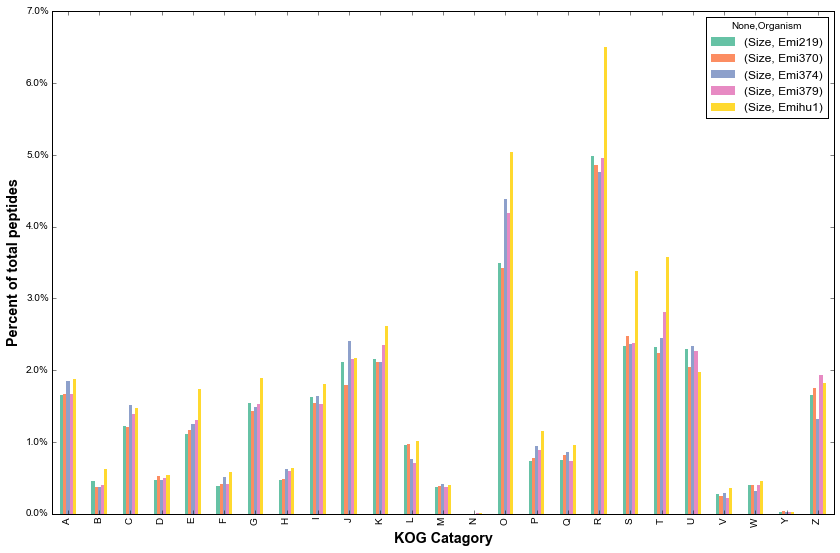

In [396]:
specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
#group the classes to create counts by catagory
Grouping_ClassOrg=pd.DataFrame(KOG_MasterPD.groupby(['class', 'Organism']).size())
Grouping_ClassOrg.columns=['Size']
Grouping_ClassOrg_SingleOnly=Grouping_ClassOrg.copy()
#drop all values that are more than one catagory
for val, df in Grouping_ClassOrg_SingleOnly.groupby(level=0):
    l=len(val)
    if l>1:
        Grouping_ClassOrg_SingleOnly=Grouping_ClassOrg_SingleOnly.drop(val)

Count=pd.DataFrame.from_dict(gFHash_inverted, orient='index')
Count['Species']=[i.split('|')[0] for i in Count.index]
Species_Transcriptome_Size=Count.groupby('Species').size()

#Normalize to the total number of transcripts per strain
for s in Grouping_ClassOrg_SingleOnly.index:
    val=Grouping_ClassOrg_SingleOnly.loc[s]
    div=Species_Transcriptome_Size.loc[s[1]]
    Grouping_ClassOrg_SingleOnly.loc[s]=val/div

fig,ax=plt.subplots(1)
fig.set_figheight(9)
fig.set_figwidth(14)

Grouping_ClassOrg_SingleOnly.unstack().plot(kind='bar',ax=ax, colors=color_ind, lw=0, grid=False, legend=['Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1'])
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Percent of total peptides', weight='bold', size='x-large')
ax.set_xlabel('KOG Catagory', weight='bold', size='x-large')


##Now, let's compare the content across the different orthologus groups

In [397]:
OrthologusGroup_To_Set=invert(Genes_Uniq_Venn)
KOG_MasterPD['Species_sets']=KOG_MasterPD['OrthoMCLGroups'].map(OrthologusGroup_To_Set)


In [398]:
#count the number of A-Z across the different orthologus groupings
SetClass_Count=KOG_MasterPD.groupby(['Species_sets', 'class']).size()
for i in SetClass_Count.index:
    if len(i[1])>1:
        SetClass_Count=SetClass_Count.drop(i)
for s in SetClass_Count.index:
    val=SetClass_Count.loc[s]
    div=float(len(Genes_Uniq_Venn_PaperUpdate[s[0]]))
    SetClass_Count.loc[s]=val/div

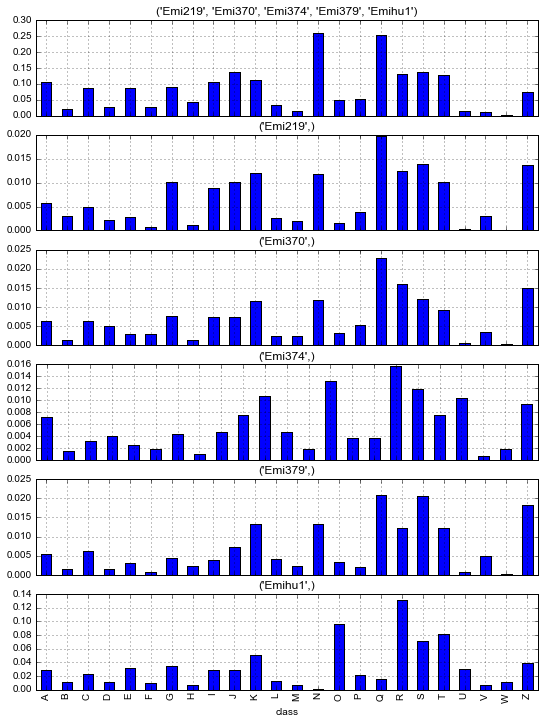

In [399]:
GroupsOfInt=[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1'), ('Emi219',), ('Emi370',), ('Emi374',), ('Emi379',), ('Emihu1',)]
fig,axs=plt.subplots(6)
fig.set_size_inches(9,12)
for g, ax in zip(GroupsOfInt, axs):
    SetClass_Count.loc[g].plot(kind='bar', ax=ax)
    ax.set_title(g)

In [400]:
g=GroupsOfInt[0]
SetClass_Count=KOG_MasterPD.groupby(['Species_sets', 'class']).size()
SetClass_Count.loc[g].sum()/float(len(Genes_Uniq_Venn[g]))

4.0684722487125695

In [401]:
SetClass_Count.loc[g].size

139

In [402]:
KOG_MasterPD.groupby('Species_sets').size()

Species_sets
(Emi219,)                                    1415
(Emi219, Emi370)                             1422
(Emi219, Emi370, Emi374)                      502
(Emi219, Emi370, Emi374, Emi379)             2188
(Emi219, Emi370, Emi374, Emi379, Emihu1)    21331
(Emi219, Emi370, Emi374, Emihu1)             2830
(Emi219, Emi370, Emi379)                     1122
(Emi219, Emi370, Emi379, Emihu1)             5459
(Emi219, Emi370, Emihu1)                     4967
(Emi219, Emi374)                              109
(Emi219, Emi374, Emi379)                      137
(Emi219, Emi374, Emi379, Emihu1)              869
(Emi219, Emi374, Emihu1)                      274
(Emi219, Emi379)                              222
(Emi219, Emi379, Emihu1)                      502
(Emi219, Emihu1)                              791
(Emi370,)                                    1759
(Emi370, Emi374)                              160
(Emi370, Emi374, Emi379)                      185
(Emi370, Emi374, Emi379, Emihu1)     

In [403]:
KOG_MasterPD

,#Query,E-value,Hit,Hit-end,Hit-length,Hit-start,Identity,Query-end,Query-start,Score,class,class description,description,Organism,OrthoMCLGroups,Species_sets
Emihu1|110338,Emihu1|110338,5e-04,KOG0748,123,286,48,23,140,53,38.0,RT,Multiple classes,"Predicted membrane proteins, contain hemolysin...",Emihu1,OG1_5_5894,"(Emi219, Emi370, Emi379, Emihu1)"
Emi370|CAMPEP_0187675598,Emi370|CAMPEP_0187675598,4e-29,KOG1591,288,289,97,30,299,115,123,E,Amino acid transport and metabolism,Prolyl 4-hydroxylase alpha subunit,Emi370,OG1_5_10323,"(Emi219, Emi370, Emi379, Emihu1)"
Emihu1|359990,Emihu1|359990,2e-10,KOG4441,205,571,30,26,182,1,59.6,TR,Multiple classes,"Proteins containing BTB/POZ and Kelch domains,...",Emihu1,OG1_5_1010,"(Emihu1,)"
Emi370|CAMPEP_0187679430,Emi370|CAMPEP_0187679430,4e-35,KOG0725,254,270,7,38,283,46,143,R,General function prediction only,Reductases with broad range of substrate speci...,Emi370,OG1_5_8466,"(Emi219, Emi370, Emi374, Emi379, Emihu1)"
Emi370|CAMPEP_0187712014,Emi370|CAMPEP_0187712014,2e-08,KOG3137,229,267,24,24,184,9,53.5,J,"Translation, ribosomal structure and biogenesis",Peptide deformylase,Emi370,OG1_5_15157,"(Emi219, Emi370, Emihu1)"
Emihu1|212525,Emihu1|212525,1e-16,KOG0624,487,504,325,32,355,200,82.0,V,Defense mechanisms,"dsRNA-activated protein kinase inhibitor P58, ...",Emihu1,OG1_5_8268,"(Emi219, Emi370, Emi374, Emi379, Emihu1)"
Emihu1|212520,Emihu1|212520,5e-10,KOG3002,299,299,22,23,408,89,60.0,R,General function prediction only,Zn finger protein,Emihu1,OG1_5_11674,"(Emi219, Emi370, Emi374, Emihu1)"
Emihu1|212521,Emihu1|212521,2e-08,KOG0161,1766,1930,1047,18,737,2,56.0,Z,Cytoskeleton,Myosin class II heavy chain,Emihu1,OG1_5_12580,"(Emi219, Emi370, Emi374, Emihu1)"
Emihu1|207692,Emihu1|207692,8e-07,KOG0943,1283,3015,1242,42,867,826,52.5,O,"Posttranslational modification, protein turnov...",Predicted ubiquitin-protein ligase/hyperplasti...,Emihu1,OG1_5_4231,"(Emi219, Emi370, Emi379, Emihu1)"
Emi379|CAMPEP_0187613594,Emi379|CAMPEP_0187613594,2e-90,KOG0564,297,590,2,44,364,39,326,E,Amino acid transport and metabolism,"5,10-methylenetetrahydrofolate reductase",Emi379,OG1_5_10781,"(Emi370, Emi374, Emi379, Emihu1)"
